In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("quantbruce/real-estate-price-prediction")

print("Path to dataset files:", path)

100%|██████████| 6.98k/6.98k [00:00<00:00, 4.37MB/s]

Extracting files...
Path to dataset files: /Users/siddharth1921/.cache/kagglehub/datasets/quantbruce/real-estate-price-prediction/versions/1


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Real estate.csv')

In [8]:
df.columns = ['No',
    'house_age', 'transaction_date', 'distance_to_mrt', 
    'stores_nearby', 'latitude', 'longitude', 'price_per_unit_area'
]


In [23]:
features = ['house_age', 'distance_to_mrt', 'stores_nearby', 'latitude', 'longitude']
target = ['price_per_unit_area']

In [24]:
X = df[features]  # X is now a DataFrame with multiple columns
y = df[target]    # y remains a single column (Series)


In [36]:
# The function should accept X (features) and y (target) separately
def gradient_descent(m_now, b_now, X, y, L):
    m_gradient = 0
    b_gradient = 0
    n = float(len(X)) # Use float for division

    # Loop through all points to calculate the sum of gradients
    for i in range(len(X)):
        # Get the individual x and y values for the current point
        # .iloc[i] gets the value at index i
        x_i = X.iloc[i]
        y_i = y.iloc[i]

        # Calculate the gradient for this single point and add to the total
        m_gradient += -(2/n) * x_i * (y_i - (m_now * x_i + b_now))
        b_gradient += -(2/n) * (y_i - (m_now * y_i + b_now))

    # Update m and b *after* the loop has summed all gradients
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L

    # Return the new m and b *after* they have been updated
    return m, b

In [37]:
m = 0
b = 0 
L = 0.0001
epochs = 1000

In [38]:
for i in range(epochs):
    if i%50 == 0 :
        print(f"Epoch : {i}")

    m,b = gradient_descent(m,b,X,y,L)
print (m,b)    

Epoch : 0
Epoch : 50
Epoch : 100
Epoch : 150
Epoch : 200
Epoch : 250
Epoch : 300
Epoch : 350
Epoch : 400
Epoch : 450
Epoch : 500
Epoch : 550
Epoch : 600
Epoch : 650
Epoch : 700
Epoch : 750
Epoch : 800
Epoch : 850
Epoch : 900
Epoch : 950
distance_to_mrt       NaN
house_age             NaN
latitude              NaN
longitude             NaN
price_per_unit_area   NaN
stores_nearby         NaN
Name: 0, dtype: float64 distance_to_mrt       NaN
house_age             NaN
latitude              NaN
longitude             NaN
price_per_unit_area   NaN
stores_nearby         NaN
Name: 0, dtype: float64


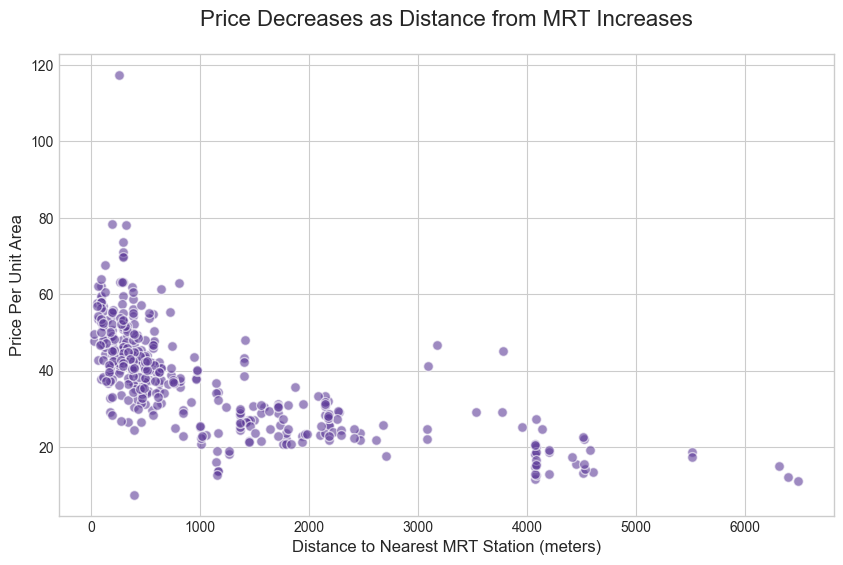

In [48]:
plt.style.use('seaborn-v0_8-whitegrid')

# 2. Create a figure with a specific size for better viewing
plt.figure(figsize=(10, 6))

# 3. Create the scatter plot with customized visuals
plt.scatter(
    df['distance_to_mrt'],
    df['price_per_unit_area'],
    alpha=0.6,                    # Add transparency to see data density
    color='#5e3c99',              # A nice purple color
    edgecolors='w',               # Add a white edge to markers
    s=50                          # Set marker size
)

# 4. Add informative labels and a title
plt.title('Price Decreases as Distance from MRT Increases', fontsize=16, pad=20)
plt.xlabel('Distance to Nearest MRT Station (meters)', fontsize=12)
plt.ylabel('Price Per Unit Area', fontsize=12)

# 5. Display the final plot
plt.show() 